In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [11]:
df.shape


(28242, 7)

In [17]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [21]:
df.duplicated().sum()

2310

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [27]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [29]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [33]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [35]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [37]:
to_drop

Index([], dtype='int64')

In [39]:
df = df.drop(to_drop)

In [41]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


<Axes: xlabel='count', ylabel='Area'>

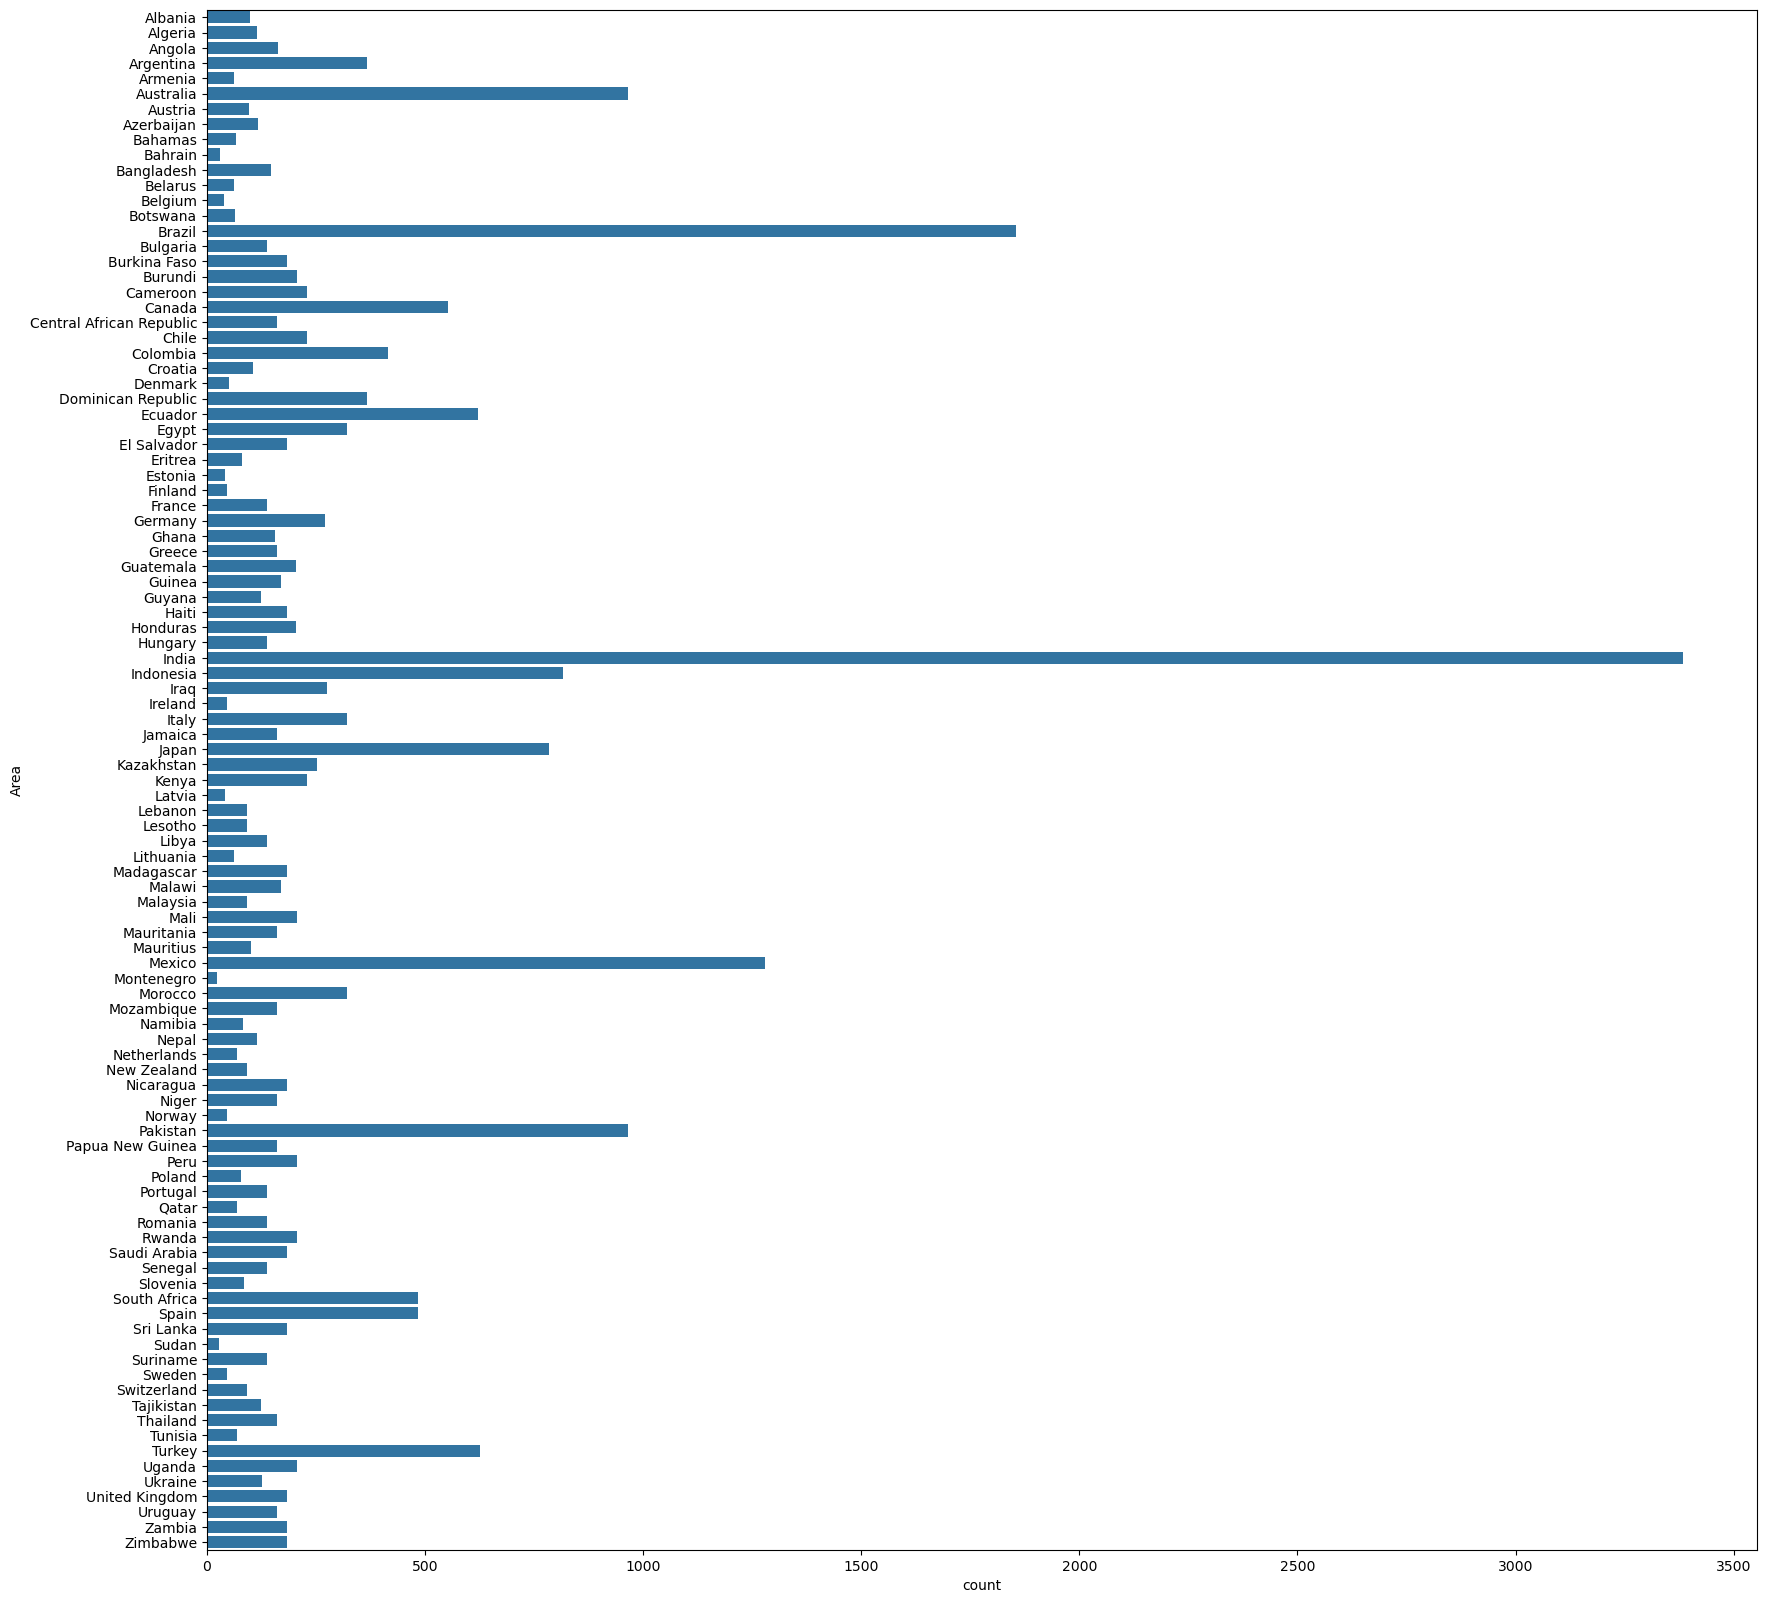

In [45]:
plt.figure(figsize = (20,20))
sns.countplot(y=df['Area'])

In [49]:
len(df['Area'])

25932

In [51]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [53]:
country = (df['Area'].unique())

In [55]:
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [57]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

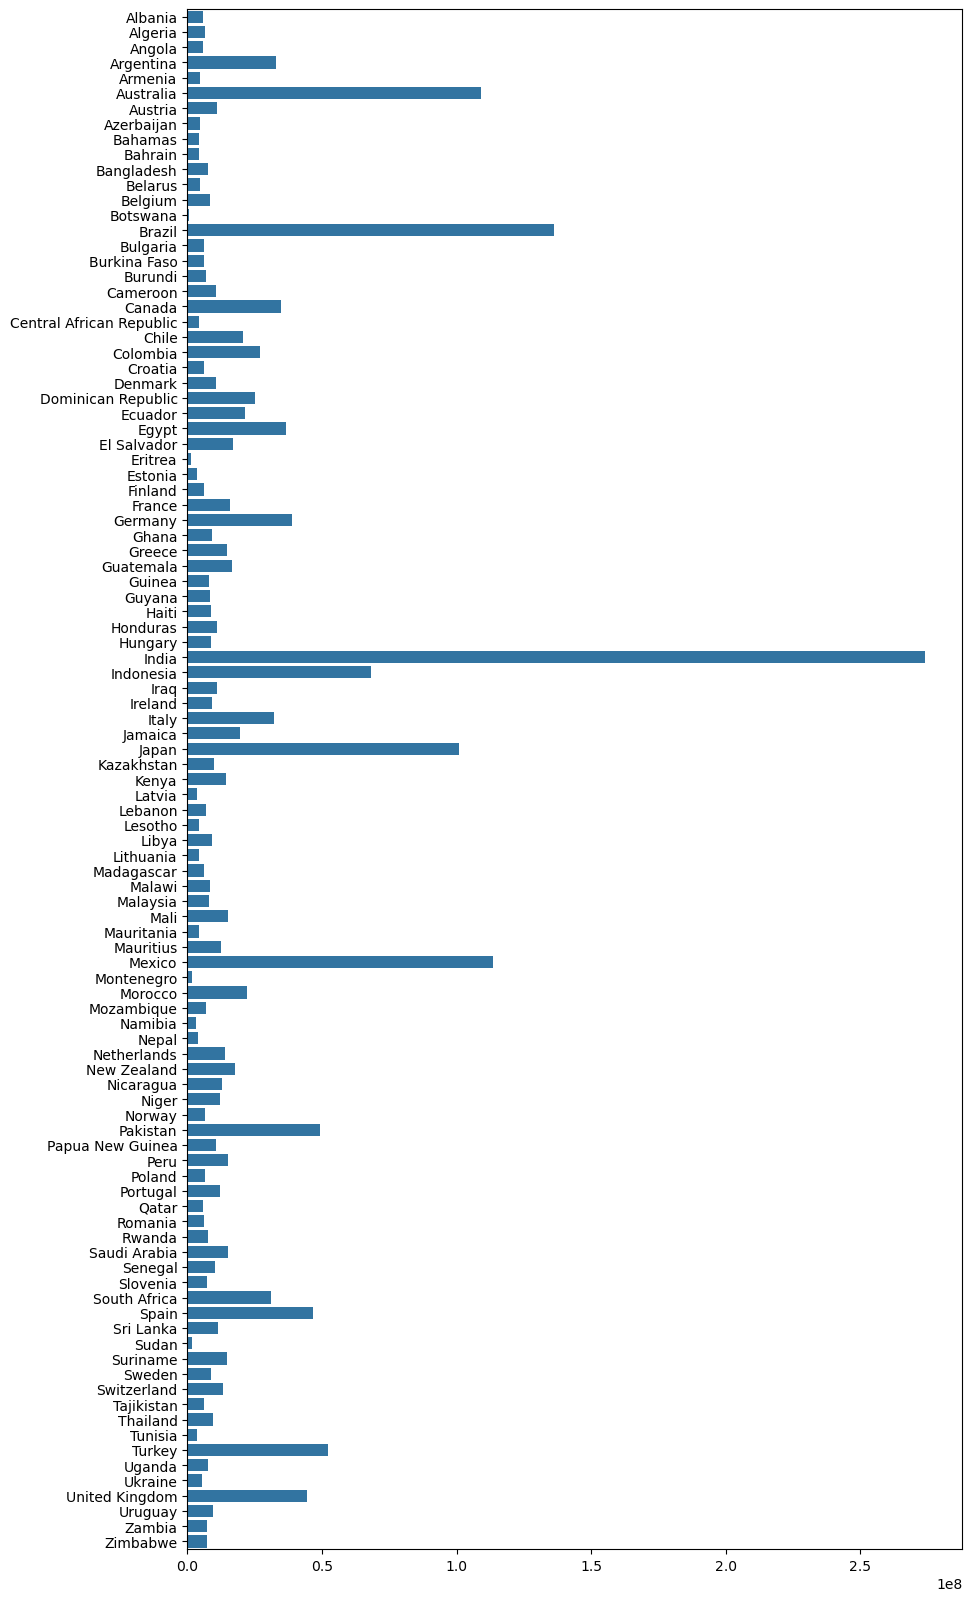

In [59]:
plt.figure(figsize=(10,20))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

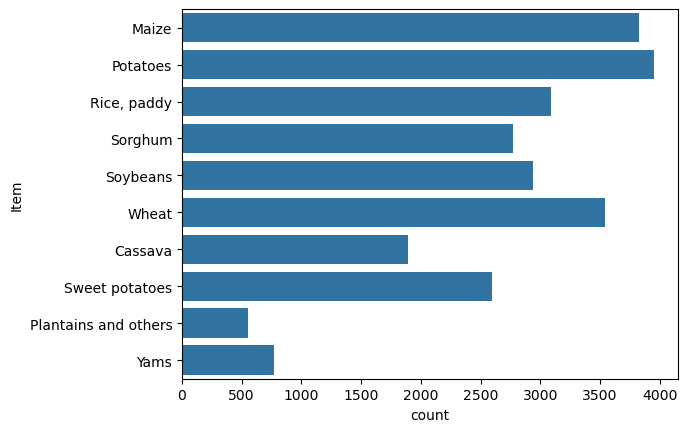

In [63]:
df['Item'].value_counts()
sns.countplot(y=df['Item'])

In [65]:
crops = (df['Item'].unique())

In [67]:
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [69]:
yield_per_crop

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

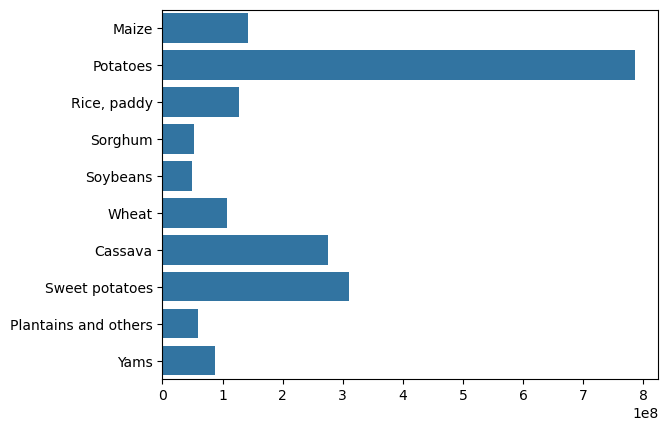

In [71]:
sns.barplot(y=crops,x=yield_per_crop)

In [73]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [75]:
col = ['Year','average_rain_fall_mm_per_year',	'pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [77]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [81]:
X=df.drop('hg/ha_yield',axis=1)	
y=df['hg/ha_yield']

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train.shape

(20745, 6)

In [89]:
X_test.shape

(5187, 6)

In [85]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


In [91]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [93]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [97]:
X_train.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum


In [99]:
preprocessor = ColumnTransformer(
transformers=[
        ('onehotencoder',ohe,[4,5]),
        ('standardization',scaler,[0,1,2,3])
    ],
remainder='passthrough'
)

In [105]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standardization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [109]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.fit_transform(X_test)

In [111]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [119]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [121]:
print(X_train_dummy.shape)  # Should be (n_samples, n_features)
print(y_train.shape)        # Should be (n_samples,)


(20745, 113)
(20745,)


In [123]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'Knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}
for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred = mod.predict(X_test_dummy)
    
    print(f"{name} MSE : {mean_squared_error(y_test,y_pred)} Score {r2_score(y_test,y_pred)}")


lr MSE : 1821769590.313467 Score 0.7486483199232865


C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.44141, tolerance: 14819338848.544123
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE : 1822352597.4122243 Score 0.7485678817523188
rg MSE : 1822662265.4027297 Score 0.748525156497658
Knr MSE : 124736774.35435513 Score 0.9827899214214448
dtr MSE : 451686498.8320802 Score 0.9376802857216007


In [127]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 28132.,  15838.,  72614., ...,  52692.,   9621., 279000.])

In [135]:
 def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
     features = np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])

     transformed_features=preprocessor.transform(features)
     predicted_value = dtr.predict(transformed_features).reshape(1,-1)
     return predicted_value[0]
     

In [137]:
Year = 1990
average_rain_fall_mm_per_year =  121.00
pesticides_tonnes = 4555
avg_temp = 40
Area = 'Saudi Arabia'	
Item = 'Sorghum'

result = prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)

C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [168]:
result

array([1257.])

In [141]:
Year = 1990
average_rain_fall_mm_per_year =  1485.0
pesticides_tonnes = 121.0
avg_temp = 16.37
Area = 'Albania'	
Item = 'Maize'

result = prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)

C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [143]:
result


array([11000.])